In this script, I explore a data set of echocardiogram (echo) data measured in 778 patients having high blood pressure. In addition, this data set indicates whether or not a patient has a chronic heart condition known as LVH (distention of the left ventricle).

**I propose a random forest classifier that — based on (a subset of) the echocardiogram results — predicts the presence of the heart condition in patients.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook

## 1. Read in the data and tidy it up into a DataFrame of floats.

In [3]:
data = pd.read_csv('echo_data')
data

,lvidd,lvids,la,ef,ma_dec,ea_ratio,mws,cws,lvh
0,5.70,?,3.70,58.00,?,?,249.30,456.47,Normal.
1,7.70,6.60,?,20.00,?,?,260.92,443.43,LVH.
2,6.20,4.30,4.60,59.00,?,?,255.63,478.96,LVH.
3,5.70,4.40,3.80,49.00,?,?,195.28,381.94,Normal.
4,9.10,?,4.60,17.00,?,?,259.55,395.67,LVH.
5,6.60,5.60,5.20,28.00,?,?,343.32,630.72,LVH.
6,4.30,2.80,3.70,60.00,?,?,128.20,276.00,Normal.
7,?,?,?,46.00,?,?,190.98,381.41,Normal.
8,6.70,5.70,?,31.00,?,?,?,?,LVH.
9,5.90,?,?,18.00,?,?,136.40,271.91,LVH.


Variable names:

* *LVIDD* — Left-ventricular internal dimension, *diastole* (the inner diameter of the heart's left lower chamber when that chamber is relaxed).


* *LVIDS* — Left-ventricular internal dimension, *systole* (the inner diameter of that same chamber when it contracts).


* *LA* — Left atrial size (the size of the smaller chamber above the heart's left ventricle).


* *EF* — Ejection fraction (the percentage of blood expelled from the heart after each pump).


* *MA_DEC* — Mitral inflow deceleration time at annulus.


* *EA_RATIO* — Mitral E to A ratio. (After it contracts, the left ventricle fills with blood from the atrium above it, through the mitral valve. When this early filling (E) is complete, the atrium contracts, pushing more blood into the filled ventricle (A). This variable is the ratio of the amount of mitral inflow during these two stages.)


* *MWS —* Meridional wall stress (stress tangential to the length of the heart wall).


* *CWS —* Circumferential wall stress (stress around the circumference of the heart wall).

In [4]:
data.index.name = 'patient'
data['lvh'] = np.where(data['lvh'] == 'LVH.', 1, 0)
data.replace('?', np.nan, inplace=True)

data = data.apply(pd.to_numeric)

data.head()

,lvidd,lvids,la,ef,ma_dec,ea_ratio,mws,cws,lvh
patient,,,,,,,,,
0,5.7,NaN,3.7,58.0,NaN,NaN,249.30,456.47,0
1,7.7,6.6,NaN,20.0,NaN,NaN,260.92,443.43,1
2,6.2,4.3,4.6,59.0,NaN,NaN,255.63,478.96,1
3,5.7,4.4,3.8,49.0,NaN,NaN,195.28,381.94,0
4,9.1,NaN,4.6,17.0,NaN,NaN,259.55,395.67,1


## 2. Take a closer look at the data and its missing values.

<IPython.core.display.Javascript object>


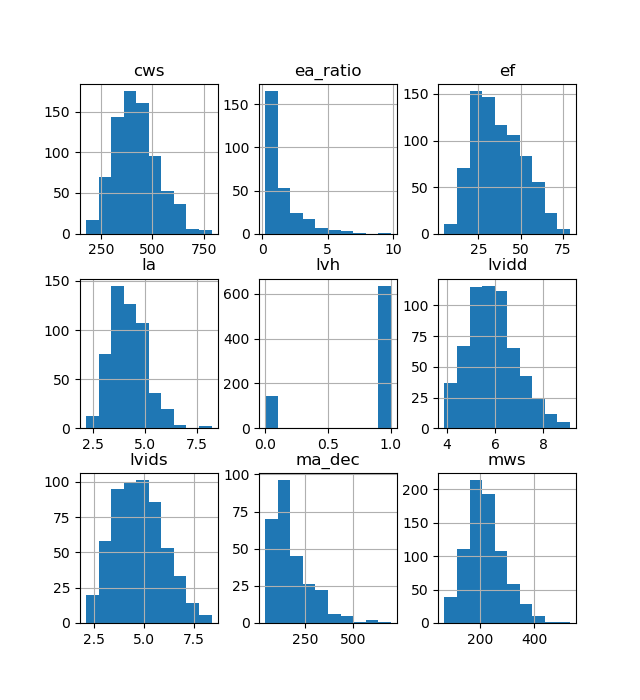

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7306c87ac8>,
      dtype=object)

In [5]:
data.hist(figsize=(6.4, 7))

The data appears to be right-skewed. (Note that the center histogram are the responses we are trying to predict: LVH (1) or normal (0).)

Running `1 - data['lvh'].sum()/data.shape[0]` shows us that all but 18% of the patients have LVH. Thus we could recommend that every patient be treated for LVH. Such a policy would yield no false negatives and an error rate of 18%.

**The testing error of a classifier must therefore be smaller than 18% in order for it to be worthwhile.**

Next, we develop a sense of the linear interdependencies in our data by examining their correlation matrix.

<IPython.core.display.Javascript object>


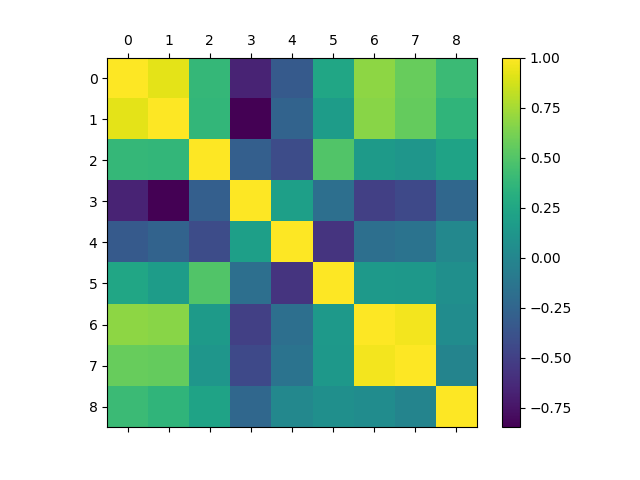

             lvidd     lvids        la        ef    ma_dec  ea_ratio  \
lvidd     1.000000  0.927745  0.381542 -0.662069 -0.326368  0.246252   
lvids     0.927745  1.000000  0.378561 -0.847876 -0.259162  0.176615   
la        0.381542  0.378561  1.000000 -0.287708 -0.416758  0.500338   
ef       -0.662069 -0.847876 -0.287708  1.000000  0.196010 -0.171842   
ma_dec   -0.326368 -0.259162 -0.416758  0.196010  1.000000 -0.566762   
ea_ratio  0.246252  0.176615  0.500338 -0.171842 -0.566762  1.000000   
mws       0.689533  0.672509  0.160760 -0.499491 -0.176236  0.142137   
cws       0.568410  0.562676  0.121076 -0.437495 -0.146997  0.137155   
lvh       0.411677  0.364705  0.224251 -0.233383  0.011854  0.075852   

               mws       cws       lvh  
lvidd     0.689533  0.568410  0.411677  
lvids     0.672509  0.562676  0.364705  
la        0.160760  0.121076  0.224251  
ef       -0.499491 -0.437495 -0.233383  
ma_dec   -0.176236 -0.146997  0.011854  
ea_ratio  0.142137  0.137155  0.0

In [6]:
c = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(c)
fig.colorbar(mat)

print(c)

In [7]:
data.isnull().sum()

lvidd       182
lvids       213
la          250
ef           10
ma_dec      504
ea_ratio    503
mws          16
cws          20
lvh           0
dtype: int64

Notice that quite a lot of mitral data is missing (`ma_dec` and `ea_ratio`). Furthermore, whenever one of these variables is missing for a patient, the other often is too:

In [8]:
sum(data['ma_dec'].isnull() & data['ea_ratio'].isnull())

492

Because so much data is missing in the `ma_dec` and `ea_ratio` columns, it is tempting to discard them altogether. Before doing so, however, we assess whether this data is predictive when present. To do so, we first consider only those patients for whom it was measured.

In [9]:
subset = data[data['ma_dec'].notnull() & data['ea_ratio'].notnull()]

print(('The two mitral features are available for {0:d}/{1:d} '
       'patients').format(subset.shape[0], data.shape[0]))

subset.head()

The two mitral features are available for 263/778 patients


,lvidd,lvids,la,ef,ma_dec,ea_ratio,mws,cws,lvh
patient,,,,,,,,,
16,6.4,5.4,NaN,29.0,376.0,0.51,208.92,413.03,1
18,NaN,NaN,4.2,36.0,136.0,0.47,170.98,NaN,1
19,6.3,NaN,NaN,37.0,168.0,0.64,325.28,628.38,1
20,4.4,2.9,NaN,63.0,164.0,0.98,175.44,373.34,0
23,NaN,NaN,3.2,17.0,420.0,0.25,263.23,484.81,1


We impute the remaining missing values as the column means:

In [10]:
subset = subset.fillna(subset.mean())
X, y = subset.drop('lvh', axis=1).values, subset['lvh'].values

## 3. Predict LVH by training a random forest.

In [11]:
from sklearn.ensemble import RandomForestClassifier

### 3.1. First consider only those patients with mitral data.

In [12]:
RANDOM_STATE = 201807150
clf = RandomForestClassifier(n_estimators=500, max_features="sqrt",
                             random_state=RANDOM_STATE)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=201807150, verbose=0,
            warm_start=False)

Plot the feature importances.

<IPython.core.display.Javascript object>


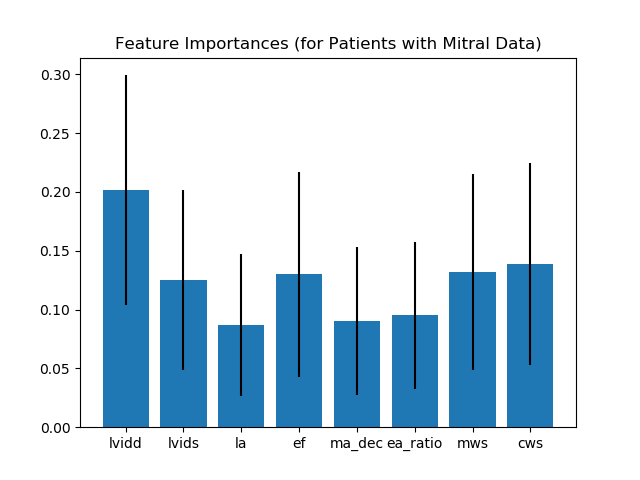

Text(0.5,1,'Feature Importances (for Patients with Mitral Data)')

In [13]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(data.columns[:-1], clf.feature_importances_, yerr=std)

ax.set_title('Feature Importances (for Patients with Mitral Data)')

**From this figure we conclude that the mitral data is not especially important. Since it is missing for the majority of patients anyway, we go ahead and discard it completely.**

In [14]:
data.drop(['ma_dec', 'ea_ratio'], axis=1, inplace=True)

### 3.2. Fit a RF to all 778 patients using the 6-feature data set.

As before, we impute the missing data using the feature mean, and recast it in the format requried by `scikit-learn`.

In [15]:
data = data.fillna(data.mean())
X, y = data.drop('lvh', axis=1).values, data['lvh'].values

In [16]:
%%time

def fit_rf(X, y, min_estimators=20, max_estimators=500):
  """
  Repeatedly fits a random forest using more and more trees.
  
  This function returns the random forest using the maximal number of
  trees and the OOB errors corresponding to the different forest sizes.
  
  Note: The code for this function is essentially straight from an example
  in the scikit-learn documentation.
  """
  
  RANDOM_STATE = 201807151
  clf = RandomForestClassifier(warm_start=True, oob_score=True,
                               random_state=RANDOM_STATE)
  
  error = []
  for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X, y)
    
    oob_error = 1 - clf.oob_score_
    error.append((i, oob_error))
    
  return clf, error

n_features = X.shape[1]

# We store the forests and their OOB errors as dictionaries of tuples.
clf = {}; error = {}
clf[n_features], error[n_features] = fit_rf(X, y)

CPU times: user 17.9 s, sys: 32.9 ms, total: 18 s
Wall time: 18 s


<IPython.core.display.Javascript object>


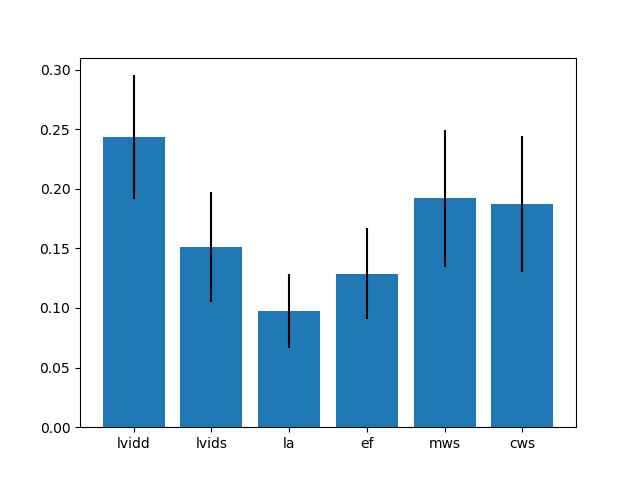

<BarContainer object of 6 artists>

In [17]:
std = np.std([tree.feature_importances_ 
              for tree in clf[n_features].estimators_], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(data.columns[:-1], clf[n_features].feature_importances_, yerr=std)

Plot the OOB error (effectively the testing error) as a function of the number of trees in the forest.

<IPython.core.display.Javascript object>


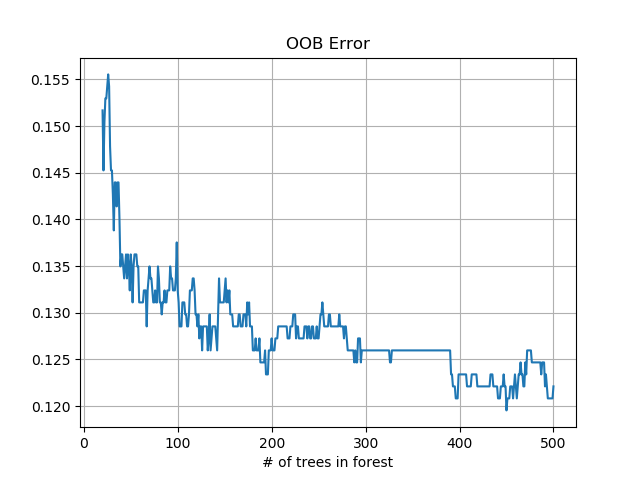

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
(n_estimators, oob_error) = zip(*error[n_features])
ax.plot(n_estimators, oob_error)

ax.set_xlabel('# of trees in forest')
ax.set_title('OOB Error')
ax.grid()

### 3.3 Explore feature importance more carefully — can we develop a cleaner model?

In [19]:
importances = clf[n_features].feature_importances_
ordering = importances.argsort()[::-1]
pd.Series(importances[ordering], index=data.columns[ordering])

lvidd    0.243523
mws      0.191953
cws      0.187162
lvids    0.151124
ef       0.128717
la       0.097522
dtype: float64

We explore whether we can attain comparable OOB errors from fewer variables. We begin by training a random forest using only the most important variable (LVIDD). Then we add the second most important variable, the third most important, and so on until we fit a RF with all 6 of the variables being considered.

Train:

In [20]:
%%time
for i in range(1, n_features):
  clf[i], error[i] = fit_rf(X[:, ordering[:i]], y)

CPU times: user 1min 25s, sys: 64.1 ms, total: 1min 25s
Wall time: 1min 25s


Plot:

<IPython.core.display.Javascript object>


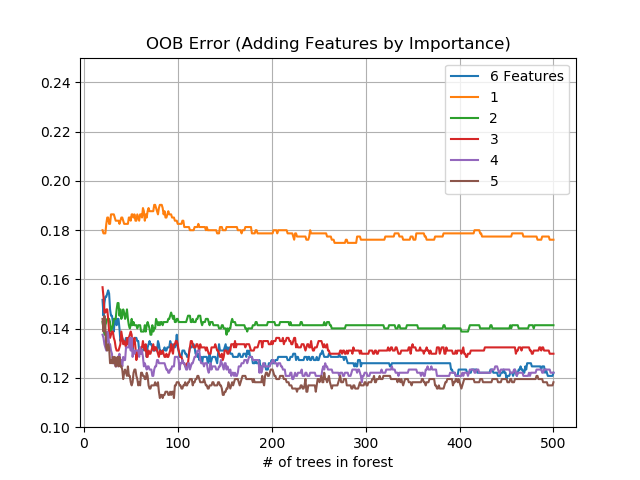

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

(n_estimators, oob_error) = zip(*error[n_features])
ax.plot(n_estimators, oob_error, label=str(n_features) + ' Features')
  
for i in range(1, n_features):  
  (n_estimators, oob_error) = zip(*error[i])
  ax.plot(n_estimators, oob_error, label=str(i))
  
ax.set_xlabel('# of trees in forest')
ax.set_ylim([0.1, 0.25])
ax.set_title('OOB Error (Adding Features by Importance)')

ax.grid()
ax.legend(loc='upper right')

From this plot, we see that the predictive power of the random forest is not much improved when using more than the 3 top features: `lvidd`, `mws`, and `cws`. 

**I prefer to instead train the RF to `lvidd`, `mws`, and `lvids`** — the fourth most important feature. The OOB randomization technique for assessing significance (implemented in MATLAB and R) usually ranks it third, and I also prefer `lvids` to `cws` in part because `cws` is so strongly correlated with `mws` (0.97). 

(All other conclusions based on feature importance remain the same in this analysis when using the OOB randomization technique.)

My preferred model might be slightly better:

In [22]:
ordering = [list(data.columns).index(x) for x in ['lvidd', 'mws', 'lvids']]
model, model_error = fit_rf(X[:, ordering], y)

<IPython.core.display.Javascript object>


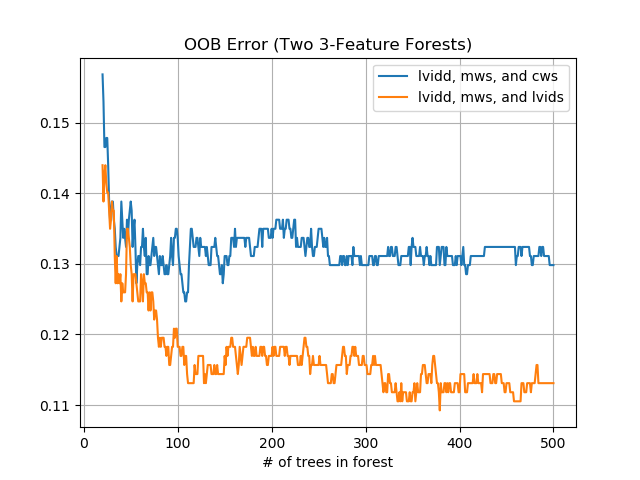

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

(n_estimators, oob_error) = zip(*error[3])
ax.plot(n_estimators, oob_error, label='lvidd, mws, and cws')

(n_estimators, oob_error) = zip(*model_error)
ax.plot(n_estimators, oob_error, label='lvidd, mws, and lvids')

ax.set_xlabel('# of trees in forest')
ax.set_title('OOB Error (Two 3-Feature Forests)')

ax.grid()
ax.legend(loc='upper right')

Check the false negative rate of our model:

In [24]:
np.sum(((model.oob_decision_function_[:, 1] > 0.5) - y) < -0.5)/778

0.032133676092544985

This 3% false-negative error is quite good!

## 4. Compare our random forest to other classifiers.

To compare our random forest to other classifiers, we divide our 6-feature data set into training and testing subsets (67/33):

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
RANDOM_STATE = 201807152

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,
                                              random_state=RANDOM_STATE)

The other classifiers we consider are
  
  
1. boosted decision trees

2. logistic regression, and 

3. a support vector machine (SVM).

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [28]:
# Boosted decision trees (AdaBoost).
RANDOM_STATE = 201807153
boosting = AdaBoostClassifier(random_state=RANDOM_STATE)
boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
boosting_error = 1 - accuracy_score(y_test, y_pred)

# Logistic regression.
RANDOM_STATE = 201807154
logistic = LogisticRegression(random_state=RANDOM_STATE)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
logistic_error = 1 - accuracy_score(y_test, y_pred)

# SVM.
RANDOM_STATE = 201807155
svm = SVC(random_state=RANDOM_STATE)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_error = 1 - accuracy_score(y_test, y_pred)

print(('Boosting Error: {0:f}\nLogistic Regression Error: {1:f}\n'
       'SVM Error: {2:f}').format(boosting_error, logistic_error, svm_error))
print('\nLogistic Regression Coefficients:\n' 
      + str(logistic.intercept_) + '\n' + str(logistic.coef_[0]))

Boosting Error: 0.165385
Logistic Regression Error: 0.184615
SVM Error: 0.184615

Logistic Regression Coefficients:
[-2.21448776]
[ 0.94252718  0.55875535  0.31704406 -0.02164233  0.01474708 -0.01840839]


The testing error of these three methods are all larger than the OOB error of the random forest we propose ($\approx 0.12$). Of course, we could try to tune some of these alternative methods to improve their methods, but the point is that our RF model is quite good. (To boot, it uses only three features instead of six.)

With the exception of boosting, we see that the accuracy in applying these alternative classifiers is comparable to predicting that all hypertensive patients have LVH (of which 92% do in our data set — see Section 1 of this notebook).